In [12]:
%reset -f
import pandas as pd
import numpy as np
import re
%matplotlib inline

interval = 0
if(interval==0):
    original_prices = pd.read_csv("HistoricalPrices.csv", sep=r'\s*,\s*', engine = 'python')[::-1].reset_index(drop=True)
    prices = original_prices.copy(deep = True)
    prices['Date'] = prices['Date'].apply(lambda x: int(''.join(x[0:5].split('/'))))
else:
    original_prices = pd.read_csv("EURUSD_H1.csv", names = ('Date','Close','A','B','C','D'))[::-1].reset_index(drop=True)
    prices = original_prices.copy(deep = True)
    prices['Date'] = prices['Date'].apply(lambda x: int(''.join(re.split(r'-|\s',x[5:13]))))

    
#prices['Difference'] = prices['Close'].diff(1).fillna(0)

print(prices)

      Date    Open    High     Low   Close
0      301  1.1923  1.1923  1.1923  1.1923
1      302  1.1923  1.2040  1.1923  1.2040
2      303  1.2040  1.2043  1.2040  1.2043
3      306  1.2043  1.2043  1.2017  1.2017
4      307  1.2017  1.2017  1.1888  1.1888
...    ...     ...     ...     ...     ...
3938   405  1.1764  1.1822  1.1738  1.1812
3939   406  1.1814  1.1880  1.1796  1.1873
3940   407  1.1872  1.1916  1.1861  1.1872
3941   408  1.1868  1.1927  1.1861  1.1918
3942   409  1.1913  1.1922  1.1867  1.1902

[3943 rows x 5 columns]


In [13]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

# Standardize the columns
prices_standardized=(prices-prices.min())/(prices.max()-prices.min())

prices_standardized

,Date,Open,High,Low,Close
0,0.176991,0.273782,0.270004,0.283971,0.273911
1,0.177876,0.273782,0.290994,0.283971,0.294789
2,0.178761,0.294664,0.291532,0.304972,0.295325
3,0.181416,0.295199,0.291532,0.300844,0.290685
4,0.182301,0.290559,0.286868,0.277688,0.267666
...,...,...,...,...,...
3938,0.269027,0.245404,0.251884,0.250763,0.254104
3939,0.269912,0.254328,0.262289,0.261174,0.264989
3940,0.270796,0.264680,0.268748,0.272842,0.264811
3941,0.271681,0.263966,0.270721,0.272842,0.273019


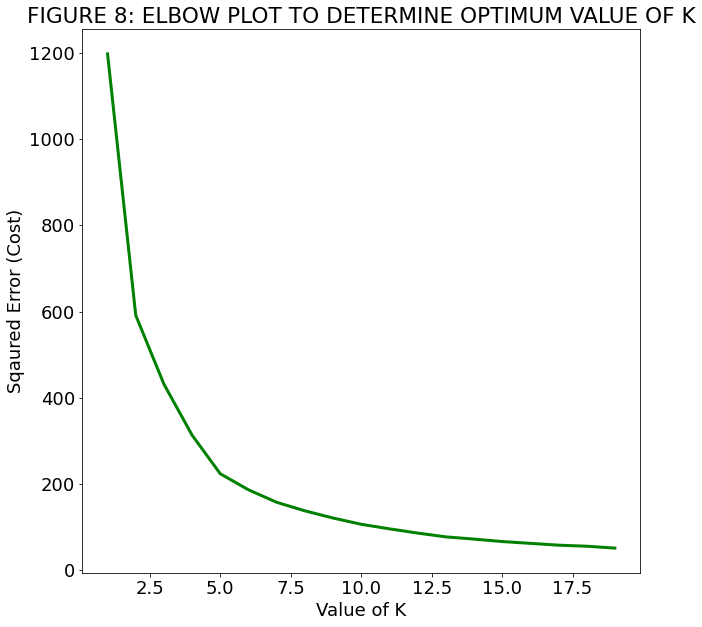

In [14]:
import matplotlib.pyplot as plt
# Finding the value of K

cost =[] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(prices_standardized) # USE STANDARDIZED DATA HERE
      
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)
    
    
# plot the cost against K values   
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})
plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.title("FIGURE 8: ELBOW PLOT TO DETERMINE OPTIMUM VALUE OF K")
plt.show()

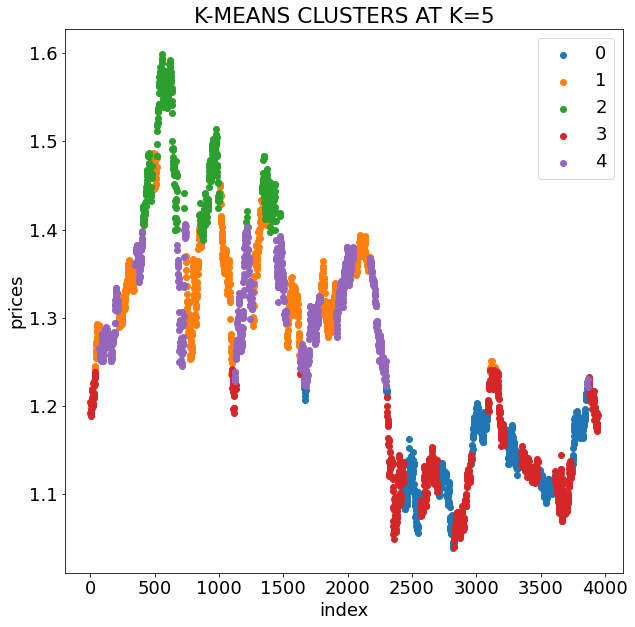

In [15]:
#####################################################################################
# BEGIN K-MEANS
#####################################################################################
num_clusters = 5
kmeans = KMeans(n_clusters= num_clusters)
label = kmeans.fit_predict(prices_standardized) 
u_labels = np.unique(label)

idx = np.array(list(prices.index))
close_price = np.array(list(prices['Close']))


fig = plt.figure()
for i in u_labels:
    plt.scatter(idx[label == i] , close_price[label == i] , label = i) 
plt.legend()
plt.xlabel("index")
plt.ylabel("prices")
plt.title("K-MEANS CLUSTERS AT K={}".format(num_clusters))
plt.show()


In [16]:
#print(original_prices[label==label[len(prices)-1]])